# Sphere valued data, i.e. $\mathbb{S}_2$, on line-graph, i.e. $\mathbb{S}_2$-signal

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from scipy.interpolate import CubicSpline
from scipy.stats import vonmises
from scipy.stats import vonmises_fisher
import imp
import relaxed_tikhonov_sphere

N = 1000
iter = 300
tau = 0.1
rho = 1

In [11]:
imp.reload(relaxed_tikhonov_sphere)

<module 'relaxed_tikhonov_sphere' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Von-Mises-Fisher

In [5]:
Noise, Data = relaxed_tikhonov_sphere.sample_vMF_signal(50,3,20)

normalization test :  1.0


/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  return 3/2*np.pi*np.exp(-1/7 - 1/(1-x)) - 3/4*np.pi


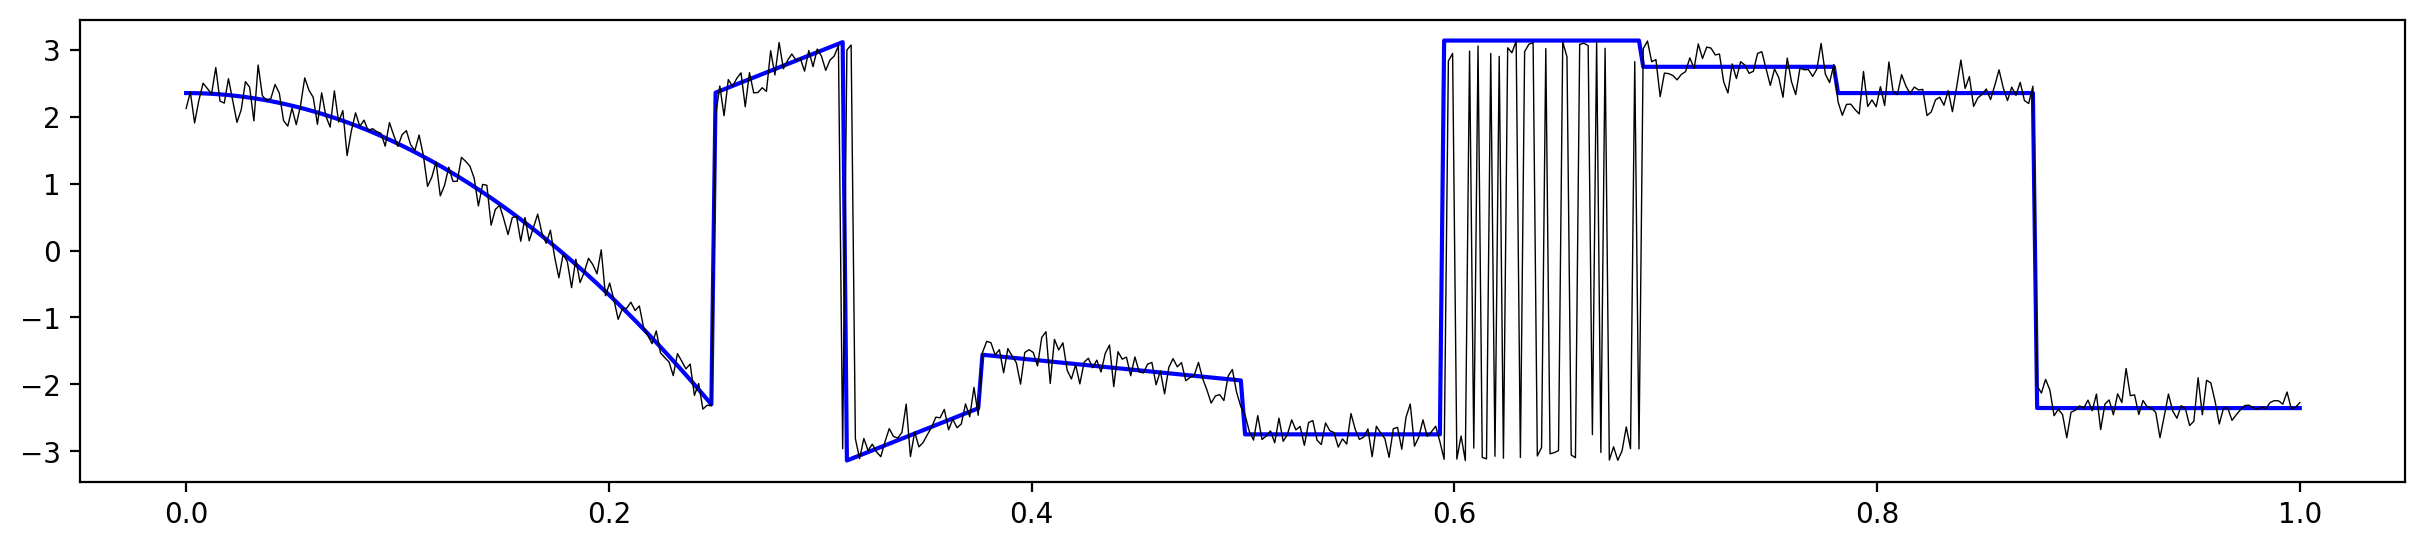

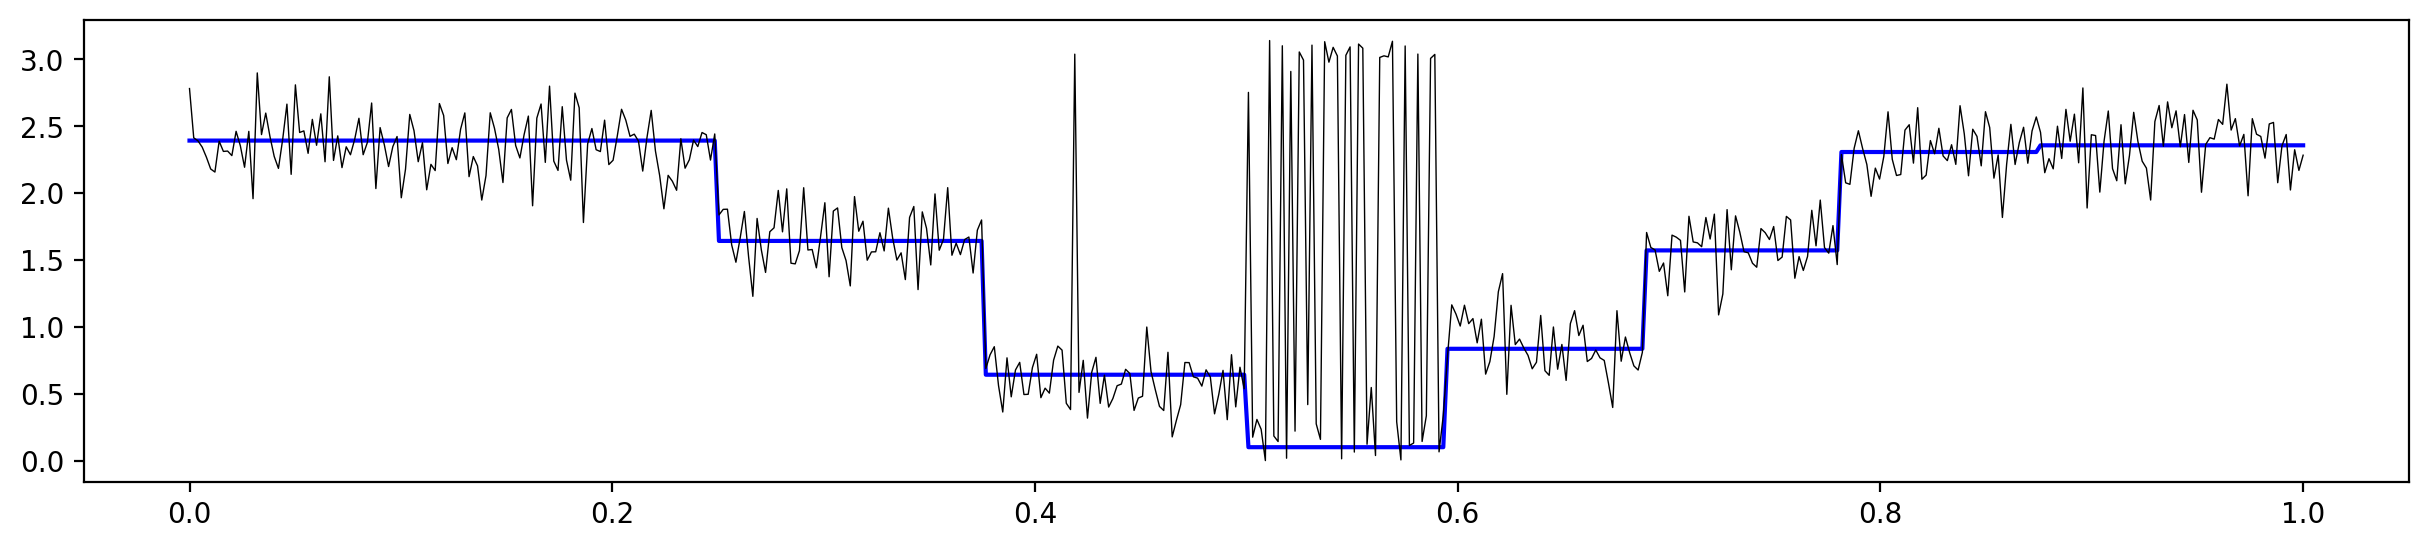

In [7]:
Toynoise, Toydata = relaxed_tikhonov_sphere.sample_toy_signal_S2(500, 1/5)

### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- ADMM : solving the complex-valued S_1-model proposed by Condat ...
- PMM : solving the complex-valued S_1-model proposed by Condat ...
- BASELINE : solving the state-of-the-art ball-relaxed problem 

- ADMM_TV_BOX : solving the rely TV problem 

In [11]:
q, qz = relaxed_tikhonov_sphere.ADMM_TV_BOX(Toynoise, Toydata, 0.5, 10, 1000)

iteration 	| funv-value 		| RMSE 		| error 	| spherical-error
----------------------------------------------------------------------------------
0  		|  412.16043394711176  	|    8.21e-01  	|    2.13e+00  	|    2.02e+01
100  		|  31.120271339871515  	|    2.17e-02  	|    6.54e-03  	|    1.09e-01
200  		|  31.590240687171207  	|    2.17e-02  	|    8.49e-06  	|    3.18e-05
300  		|  31.590245292342857  	|    2.17e-02  	|    1.89e-06  	|    3.06e-05
400  		|  31.590250871083995  	|    2.17e-02  	|    1.69e-06  	|    2.96e-05
500  		|  31.590255631786214  	|    2.17e-02  	|    1.60e-06  	|    2.88e-05
600  		|  31.590260295958647  	|    2.17e-02  	|    1.52e-06  	|    2.80e-05
700  		|  31.59026485627921  	|    2.17e-02  	|    1.45e-06  	|    2.73e-05
800  		|  31.590269307175568  	|    2.17e-02  	|    1.38e-06  	|    2.66e-05
900  		|  31.590273644988933  	|    2.17e-02  	|    1.32e-06  	|    2.60e-05
1000  		|  31.590277867184177  	|    2.17e-02  	|    1.26e-06  	|    2.54e-05
1100  		| 

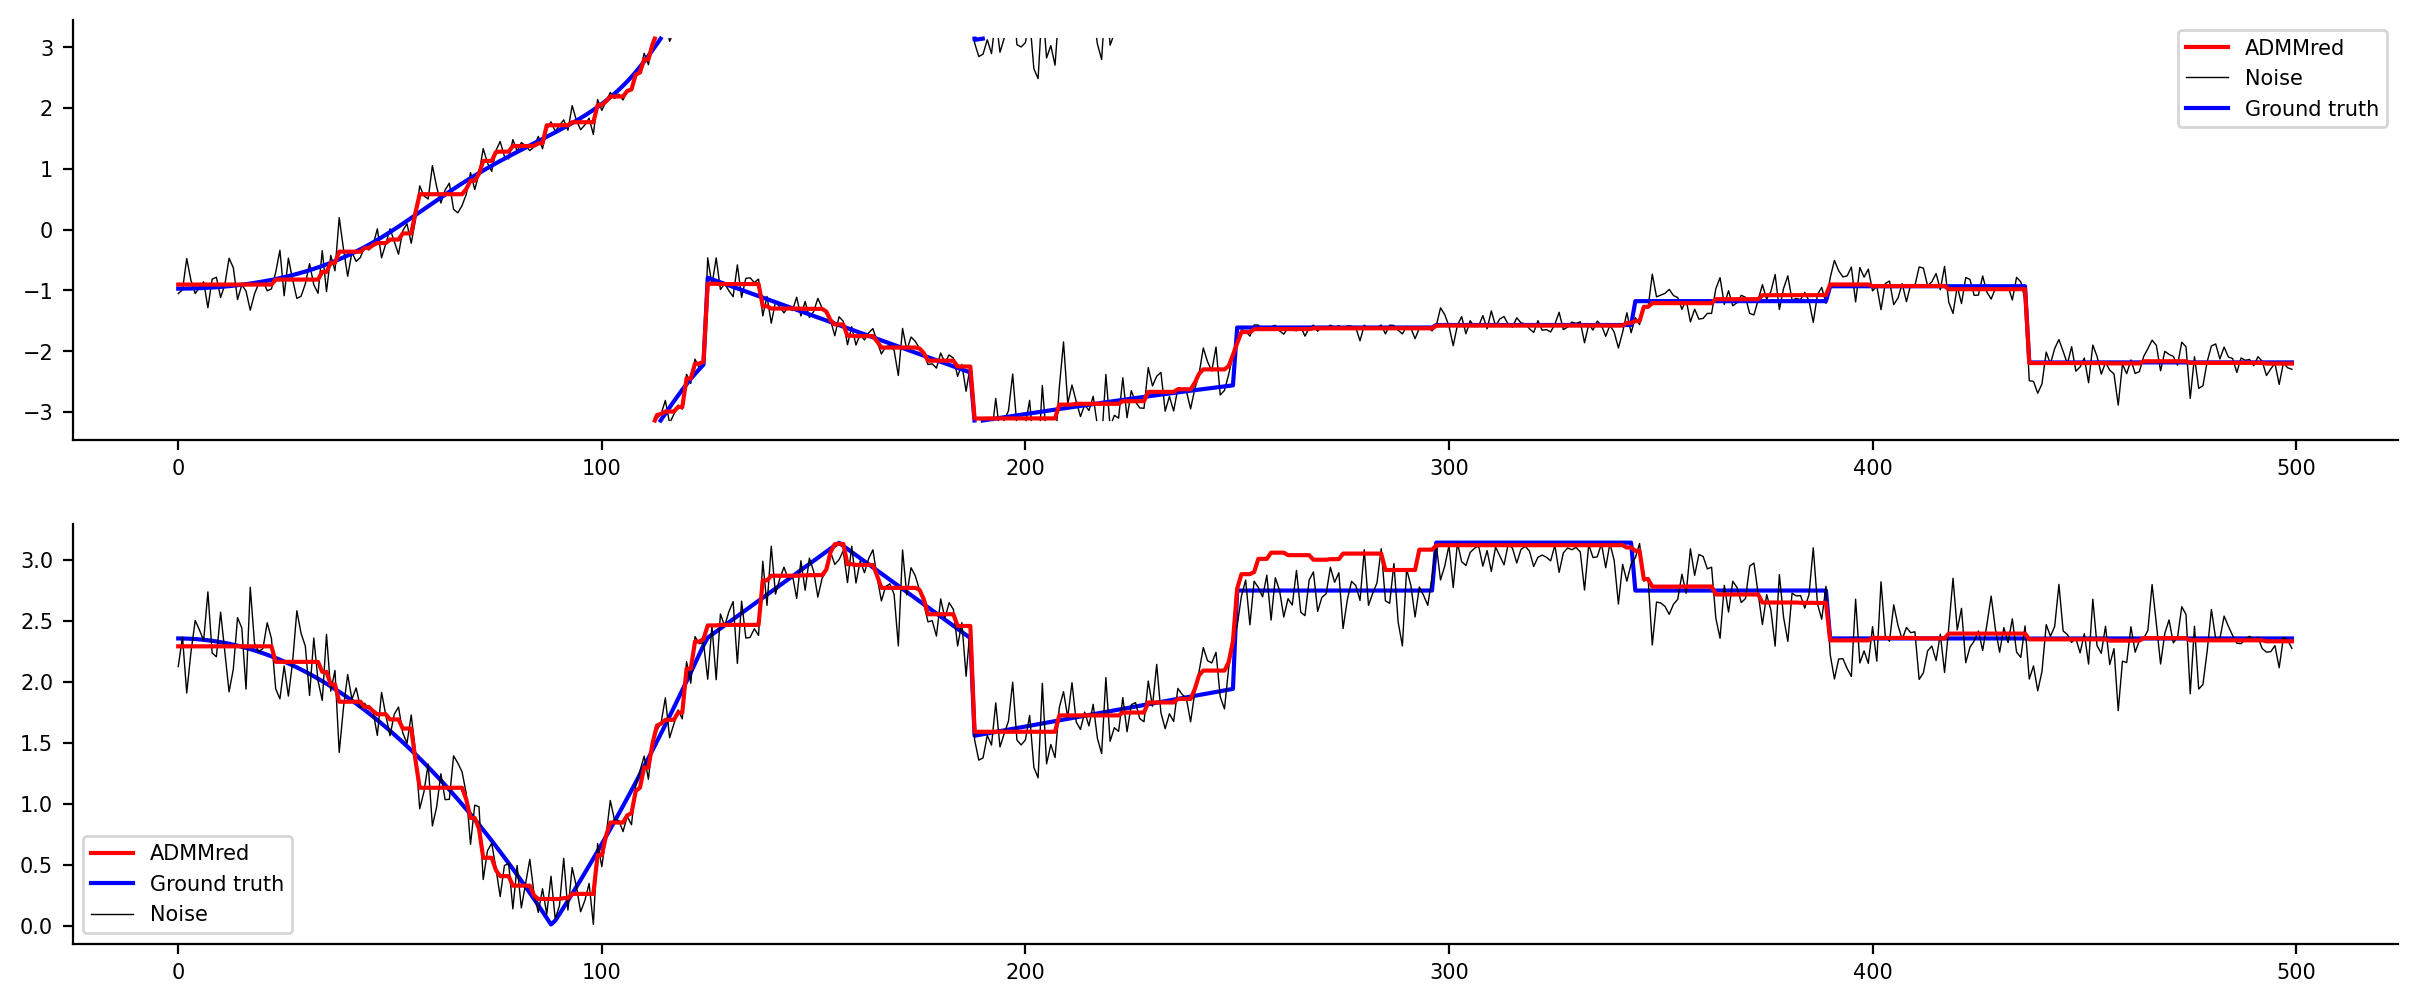

In [12]:
relaxed_tikhonov_sphere.plotS2(Toynoise, Toydata, q)

In [13]:
lamr = 20

q, dataadmm = relaxed_tikhonov_sphere.ADMM_red(Noise, Data, 2.5*lamr, 3*rho, 2*iter+1, 5)

iteration 	| func-value 	| marginal-cost 	| sherical-error
--------------------------------------------------------------------------
0 		| -3.654e+05 	|  5.694e+03 		|  9.930e-01
50 		|  6.866e+01 	|  8.324e+01 		|  2.459e-05
100 		|  6.821e+01 	|  8.332e+01 		| -1.709e-07
150 		|  6.820e+01 	|  8.331e+01 		|  1.094e-08
iteration : 184 5.0955071449279785
200 		|  6.820e+01 	|  8.331e+01 		|  4.903e-10
250 		|  6.820e+01 	|  8.331e+01 		|  2.626e-11
300 		|  6.820e+01 	|  8.331e+01 		|  1.335e-12
350 		|  6.820e+01 	|  8.331e+01 		|  6.839e-14
400 		|  6.820e+01 	|  8.331e+01 		|  3.220e-15
450 		|  6.820e+01 	|  8.331e+01 		|  1.110e-16
500 		|  6.820e+01 	|  8.331e+01 		| -2.220e-16
550 		|  6.820e+01 	|  8.331e+01 		|  2.220e-16
600 		|  6.820e+01 	|  8.331e+01 		|  0.000e+00
204 68.20121070910895 5.608980178833008
68.20122815577743 8.926367044448853
finale 		|  6.820e+01 	|  8.331e+01 		| sphered


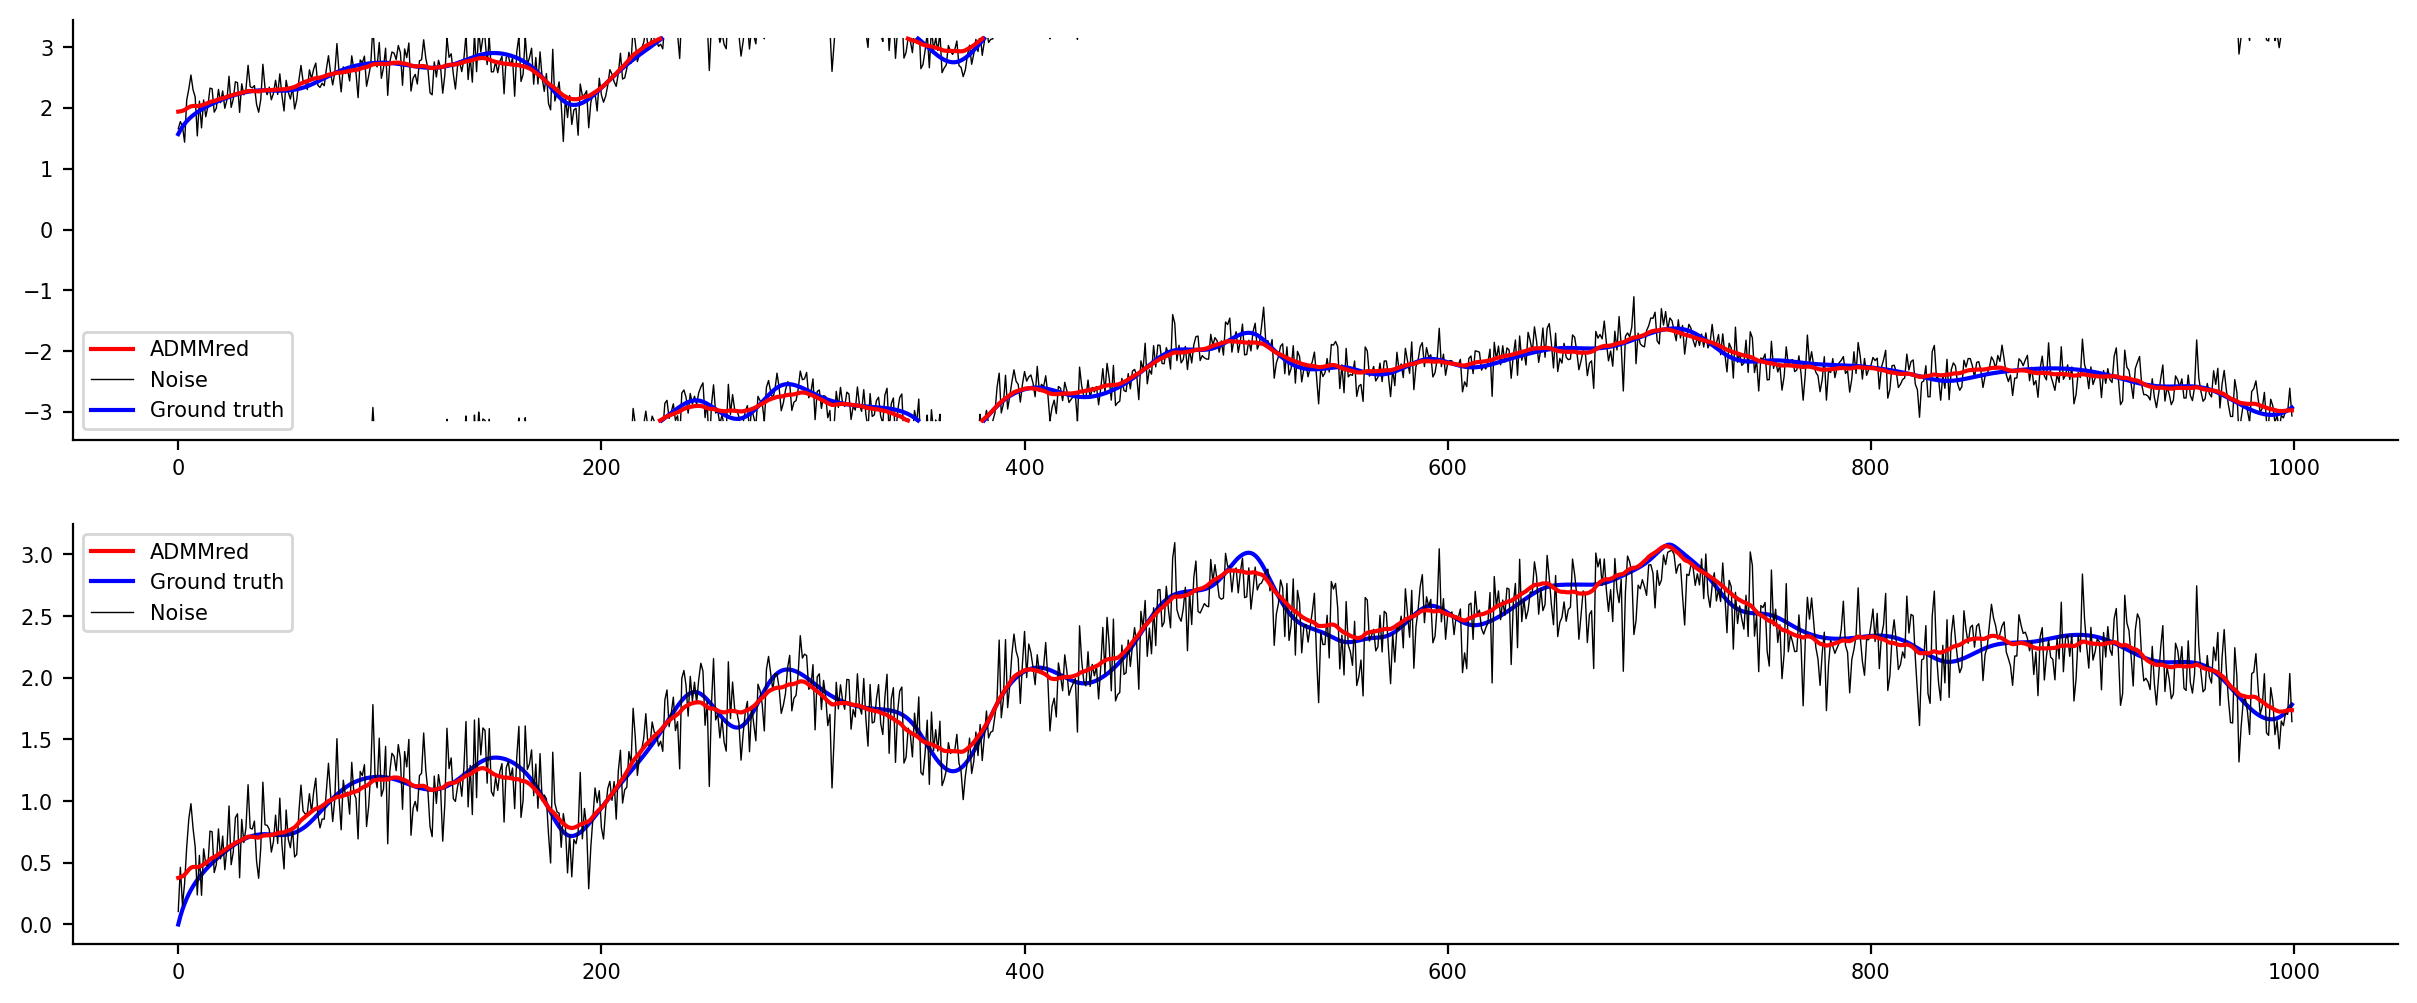

In [27]:
relaxed_tikhonov_sphere.plotS2(Noise, Data, q)

In [15]:
print('RMSE(Solution) \t=', "%10.3e"%(np.sqrt(np.sum((q - Data))**2)/1000), ' \t\t| RMSE(Noise) \t=', "%10.3e"%(np.sqrt(np.sum((Noise - Data))**2)/1000)) 
print('MAE(Solution) \t=', "%10.3e"%(np.sum(np.abs(q - Data)/1000)), ' \t\t| MAE(Noise) \t=', "%10.3e"%(np.sum(np.abs(Noise - Data)/1000))) 
print('cMSE(Solution) \t=', "%10.3e"%(np.sum(np.arccos(np.sum(q*Data,0))**2)/1000), ' \t\t| cMSE(Noise) \t=', "%10.3e"%(np.sum(np.arccos(np.sum(Noise*Data,0))**2)/1000)) 

RMSE(Solution) 	=  9.354e-03  		| RMSE(Noise) 	=  6.090e-02
MAE(Solution) 	=  1.014e-01  		| MAE(Noise) 	=  4.240e-01
cMSE(Solution) 	=  6.486e-03  		| cMSE(Noise) 	=  1.021e-01


In [16]:
q1, dataadmm = relaxed_tikhonov_sphere.baseline(Noise, Data, 2.5*lamr, 10*iter+1, 0)

iter. 		| func-value 	| non-convex-cost 	| solution is
--------------------------------------------------------------------------
0 		|  5.094e+04 	|  8.370e+03 		| unsphered
100 		|  4.354e+04 	|  1.455e+02 		| unsphered
200 		|  3.244e+04 	|  1.111e+02 		| unsphered
300 		|  2.332e+04 	|  1.061e+02 		| unsphered
400 		|  1.691e+04 	|  1.042e+02 		| unsphered
500 		|  1.271e+04 	|  1.033e+02 		| unsphered
600 		|  1.005e+04 	|  1.028e+02 		| unsphered
700 		|  8.397e+03 	|  1.025e+02 		| unsphered
800 		|  7.378e+03 	|  1.024e+02 		| unsphered
900 		|  6.756e+03 	|  1.023e+02 		| unsphered
1000 		|  6.376e+03 	|  1.022e+02 		| unsphered
1100 		|  6.146e+03 	|  1.022e+02 		| unsphered
1200 		|  6.006e+03 	|  1.022e+02 		| unsphered
1300 		|  5.921e+03 	|  1.021e+02 		| unsphered
1400 		|  5.869e+03 	|  1.021e+02 		| unsphered
1500 		|  5.838e+03 	|  1.021e+02 		| unsphered
1600 		|  5.819e+03 	|  1.021e+02 		| unsphered
1700 		|  5.807e+03 	|  1.021e+02 		| unsphered
1800 		|  5.800e+0

In [7]:
Noise2 = np.zeros((4,np.shape(Noise)[1]))
Data2 = np.zeros((4,np.shape(Data)[1]))

Noise2[1:4,:] = Noise
Data2[1:4,:] = Data

In [12]:
lamr = 20

qw2, qx2, qy2, qz2, q2data = relaxed_tikhonov_sphere.PMM_S2_S3(Noise2, Data2, 2.5*lamr, 3*iter+1, tau, rho, 0, 5)

iteration 	| func-value 	| original-cost 	| spherical-error
------------------------------------------------------------------------
0 		|   4.519e+04 	|   4.598e+04 		|   9.034e-01
100 		|  -2.096e+03 	|   4.088e+02 		|   8.066e-06
200 		|  -2.097e+03 	|   4.084e+02 		|  -2.363e-10
300 		|  -2.097e+03 	|   4.084e+02 		|  -1.308e-12
400 		|  -2.097e+03 	|   4.084e+02 		|  -7.994e-15
500 		|  -2.097e+03 	|   4.084e+02 		|   0.000e+00
600 		|  -2.097e+03 	|   4.084e+02 		|   2.220e-16
700 		|  -2.097e+03 	|   4.084e+02 		|   2.220e-16
800 		|  -2.097e+03 	|   4.084e+02 		|  -4.441e-16
900 		|  -2.097e+03 	|   4.084e+02 		|   0.000e+00
226 -2096.7987098561525 6.689087152481079
